<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Contexto" data-toc-modified-id="Contexto-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Contexto</a></span></li><li><span><a href="#Leer-datos" data-toc-modified-id="Leer-datos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Leer datos</a></span></li><li><span><a href="#Visualizacion" data-toc-modified-id="Visualizacion-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualizacion</a></span><ul class="toc-item"><li><span><a href="#Boxplot" data-toc-modified-id="Boxplot-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Boxplot</a></span></li><li><span><a href="#Scatterplot" data-toc-modified-id="Scatterplot-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Scatterplot</a></span></li><li><span><a href="#Barplot" data-toc-modified-id="Barplot-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Barplot</a></span></li><li><span><a href="#Mapas-con-folium" data-toc-modified-id="Mapas-con-folium-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Mapas con folium</a></span></li></ul></li></ul></div>

In [1]:
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Contexto
Este dataset contiene información sobre una tienda electrónica en línea. La tienda tiene tres almacenes desde los que se entregan los productos a los clientes.

Columnas: 

- `order_id`: identificador único para cada pedido


- `customer_id`: id único para cada cliente


- `date`: La fecha en que se realizó el pedido, en formato AAAA-MM-DD



- `nearest_warehouse`: el nombre del almacén más cercano al cliente



- `shopping_cart`: lista de tuplas que representan los artículos del pedido: el primer elemento de el primer elemento de la tupla es el artículo pedido, y el segundo elemento es la cantidad pedida para dicho artículo.



- `order_price`: precio del pedido en USD. El precio del pedido es el precio de los artículos antes de que se apliquen descuentos. 


- `delivery_charges`: los gastos de envío del pedido


- `customer_lat`: latitud de la ubicación del cliente


- `customer_long`: longitud de la ubicación del cliente


- `coupon_discount`: el porcentaje de descuento que se aplicará al el precio del pedido.


- `order_total`: total del pedido en USD después de aplicar todos los descuentos y/o gastos de envío.


- `season`: la época en la que se realizó el pedido.


- `is_expedited_delivery`: indica si el cliente ha solicitado una entrega rápida


- `distance_to_nestest_warehouse`: la distancia en kilómetros, entre el cliente y el almacén más cercano a él.


- `latest_customer_review`: la última opinión del cliente sobre su pedido más reciente


- `is_happy_customer`: indica si el cliente es un cliente feliz o tuvo un problema con su último pedido.


# Leer datos

In [2]:
df = pd.read_csv('../data/datos_limpios.csv', index_col = 0)

In [3]:
df.head(2)

_id   order_id   customer_id        date  \
0  6207771e6828d639036be697  ORD037011  ID0847526574  2019-11-11   
0  6207771e6828d639036be697  ORD037011  ID0847526574  2019-11-11   

  nearest_warehouse  order_price  delivery_charges  customer_lat  \
0         Nickolson        18465            102.31    -37.823506   
0         Nickolson        18465            102.31    -37.823506   

   customer_long  coupon_discount  order_total  season  is_expedited_delivery  \
0     144.967576                0     18567.31  Spring                   True   
0     144.967576                0     18567.31  Spring                   True   

   distance_to_nearest_warehouse  \
0                         0.5736   
0                         0.5736   

                              latest_customer_review  is_happy_customer  \
0  better than alcon never buy and overpriced alc...               True   
0  better than alcon never buy and overpriced alc...               True   

                                           geometria     producto  cantidad  \
0  {'type': 'Point', 'coordinates': [144.9675756,...      iStream         2   
0  {'type': 'Point', 'coordinates': [144.9675756,...  Olivia x460         1   

  opiniones  
0   neutral  
0   neutral

# Visualizacion 

Antes de ponernos a visualiza recordamos que para los clientes tenemos algunas columnas repetidas. 

## Boxplot 

Lo usaremos para saber si tenemos algún outlier y saber los principales estadísticos de nuestras variables numéricas. 

In [4]:
# podemos extraer solo las variables que seean numéricas usando el metodo select_dtypes

numericas = df.select_dtypes(include=np.number)
numericas.head(2)

order_price  delivery_charges  customer_lat  customer_long  \
0        18465            102.31    -37.823506     144.967576   
0        18465            102.31    -37.823506     144.967576   

   coupon_discount  order_total  distance_to_nearest_warehouse  cantidad  
0                0     18567.31                         0.5736         2  
0                0     18567.31                         0.5736         1

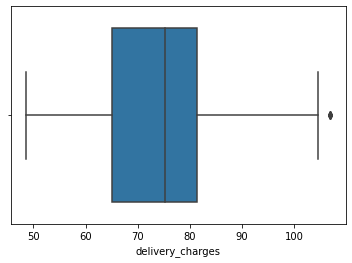

In [5]:
# hacemos el boxplot solo para una variable

sns.boxplot(x='delivery_charges', data=numericas);


Podríamos hacer esto para todas las columnas a la vez? Si!!! Usando los subplots!

`subplots`

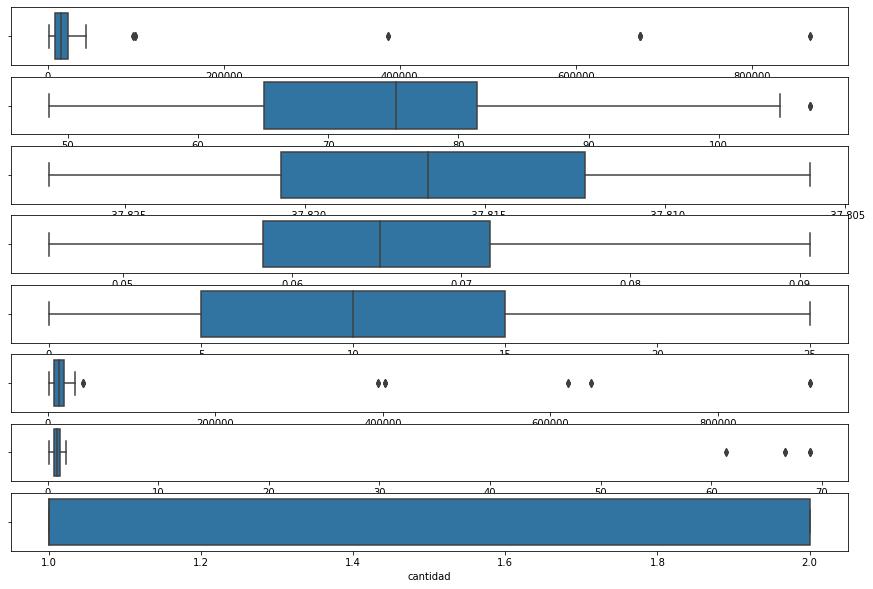

In [22]:
# sacamos una lista con el nombre de las columnas
columnas = list(numericas.columns)

fig, ax = plt.subplots(8, 1, figsize=(15,10)) # iniciamos los subplot que queremos

for i in range(len(columnas)):
    sns.boxplot(x=columnas[i], data=numericas, ax=ax[i])
plt.show()


##  Scatterplot

El gráfico de dispersión ayuda a visualizar dos variables numéricas. Ayuda a identificar la relación de los datos con cada variable, es decir, la correlación o los patrones de tendencia. También ayuda a detectar los valores atípicos en el gráfico.

**Cuándo utilizarlo**: Se utiliza en conceptos de aprendizaje automático como la regresión, donde x e y son variables continuas. También se utiliza en la agrupación de dispersiones o en la detección de valores atípicos.m

**Análisis del sistema de envio**

In [7]:
# voy a quitar algunas entradas que son outliers 

condicion = df['distance_to_nearest_warehouse'] > 10
to_plot = df[~condicion]

/usr/local/Caskroom/miniconda/base/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


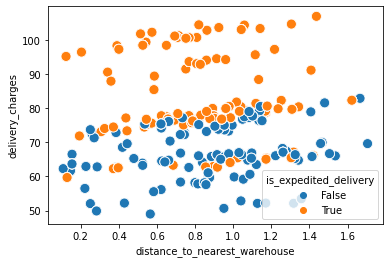

In [8]:
sns.scatterplot('distance_to_nearest_warehouse', 'delivery_charges',
                data = to_plot ,
                hue = "is_expedited_delivery",
                s = 100); # tamaño de los marcadores

## Barplot

**¿Está funcionando nuestra política de descuentos?** 

Para esto vamos a hacer un groupby para saber lo que compran, los descuentos y si están contentos. 

In [9]:
df_happy = pd.DataFrame(df.groupby(["is_happy_customer",
                "coupon_discount"])["order_total"].mean()).reset_index()

In [10]:
df_happy

is_happy_customer  coupon_discount   order_total
0              False                0  15389.416452
1              False                5  75839.608197
2              False               10  16889.964865
3              False               15   7825.477742
4              False               25  14226.638667
5               True                0  27713.108923
6               True                5  14801.072273
7               True               10  14151.316911
8               True               15  39936.206290
9               True               25  21893.935490

In [11]:
df_happy.describe().T

count          mean           std          min           25%  \
coupon_discount   10.0     11.000000      9.067647     0.000000      5.000000   
order_total       10.0  24866.674581  20042.910708  7825.477742  14370.247068   

                          50%           75%           max  
coupon_discount     10.000000     15.000000     25.000000  
order_total      16139.690658  26258.315565  75839.608197

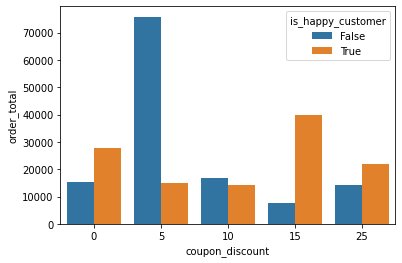

In [12]:
sns.barplot(x='coupon_discount', y='order_total', hue= "is_happy_customer", data=df_happy);


**Análisis de competencia entre almacenes**

In [13]:
df_ware = pd.DataFrame(df.groupby("nearest_warehouse")["delivery_charges"].mean())

In [14]:
df_ware

delivery_charges
nearest_warehouse                  
Bakers                    80.183409
Nickolson                 76.544161
Thompson                  71.798601

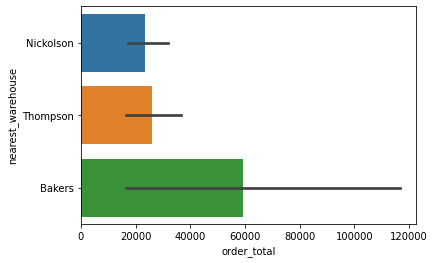

In [16]:
sns.barplot(x='order_total', y='nearest_warehouse',data=df);


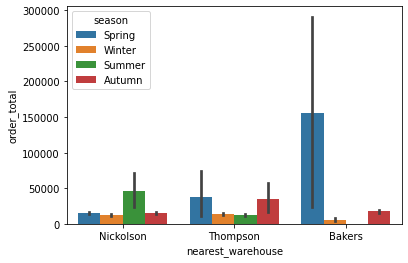

In [18]:
sns.barplot(x='nearest_warehouse', y='order_total', hue = "season",data=df);


## Mapas con folium

In [19]:
mapa=folium.Map(location=[-37.82385677492879, 144.96787921592158],  # la posicion
                tiles='openstreetmap',            # tipo de mapa, theme
                zoom_start=10)                    # zoom inicial

mapa

In [20]:
for index, row in df.iterrows(): # método para iterar por los dataframes
    if row['nearest_warehouse'] == "Thompson":
    
        folium.Marker([row["customer_lat"], row['customer_long']],
                      radius=10, 
                      tooltip = row[['is_happy_customer', 'nearest_warehouse']],
                      icon=folium.Icon(icon = "cloud", color = "red")).add_to(mapa)
    elif row['nearest_warehouse']  == "Nickolson":
        folium.Marker([row["customer_lat"], row['customer_long']],
                      radius=10, 
                      tooltip = row['is_happy_customer'],
                      icon=folium.Icon(icon = "cloud", color = "orange")).add_to(mapa)
        
    elif row['nearest_warehouse']  == "Bakers":
            folium.Marker([row["customer_lat"], row['customer_long']],
                          radius=10, 
                          tooltip = row['is_happy_customer'],
                          icon=folium.Icon(icon = "cloud", color = "black")).add_to(mapa)    
    else:
        folium.Marker([row["customer_lat"], row['customer_long']],
                      radius=10, 
                      tooltip = row['is_happy_customer'],
                      icon=folium.Icon(icon = "cloud", color = "green")).add_to(mapa)

In [21]:
mapa